Задание 1

Подключаем необходимые библиотеки

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

Функция для генерации случайных данных

In [2]:
def generate_dataset():
    num_points = np.random.randint(100, 201)
    X = np.random.rand(num_points, 2)
    y = np.random.randint(0, 2, num_points)
    return X, y

Генерация трех наборов данных

In [3]:
datasets = []
for _ in range(3):
    X, y = generate_dataset()
    datasets.append((X, y))

Обучение и тестирование KNN с разными значениями k

In [4]:
k_values = range(1, 9)
results = []

for X, y in datasets:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    accuracies = []
    
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
    
    results.append(accuracies)

Построение графиков точности классификации

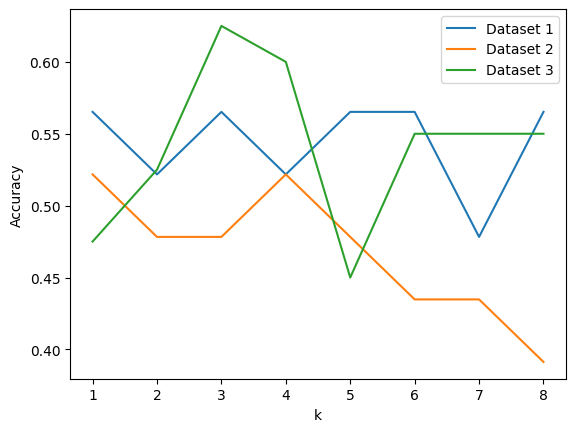

In [5]:
for i in range(3):
    plt.plot(k_values, results[i], label=f'Dataset {i+1}')

plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Вычисление точности, полноты и F1-меры, построение матрицы расхождений


In [6]:
for i, (X, y) in enumerate(datasets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    knn = KNeighborsClassifier(n_neighbors=3)  # Используем k=3
    
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    confusion = confusion_matrix(y_test, y_pred)
    
    print(f"Metrics for dataset {i+1}:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1}")
    print("Confusion Matrix:")
    print(confusion)

Metrics for dataset 1:
Accuracy: 0.5652173913043478
Precision: 0.6153846153846154
Recall: 0.6153846153846154
F1-Score: 0.6153846153846154
Confusion Matrix:
[[5 5]
 [5 8]]
Metrics for dataset 2:
Accuracy: 0.4782608695652174
Precision: 0.6666666666666666
Recall: 0.2857142857142857
F1-Score: 0.4
Confusion Matrix:
[[ 7  2]
 [10  4]]
Metrics for dataset 3:
Accuracy: 0.625
Precision: 0.5789473684210527
Recall: 0.6111111111111112
F1-Score: 0.5945945945945946
Confusion Matrix:
[[14  8]
 [ 7 11]]


----------------------------------------------------------------

Задание 2

Импорт библиотек

In [7]:
import numpy as np

Функция вычисления метрик

In [8]:
def calculate_metrics(y_true, y_pred):
    unique_labels = np.unique(y_true)
    num_labels = len(unique_labels)
    confusion_matrix = np.zeros((num_labels, num_labels), dtype=int)
    precision = np.zeros(num_labels)
    recall = np.zeros(num_labels)
    f1_score = np.zeros(num_labels)
    support = np.zeros(num_labels, dtype=int)

    for i in range(len(y_true)):
        true_label = y_true[i]
        pred_label = y_pred[i]
        true_label_index = np.where(unique_labels == true_label)[0][0]
        pred_label_index = np.where(unique_labels == pred_label)[0][0]
        confusion_matrix[true_label_index][pred_label_index] += 1
    
    for i in range(num_labels):
        true_positive = confusion_matrix[i][i]
        false_positive = np.sum(confusion_matrix[:, i]) - true_positive
        false_negative = np.sum(confusion_matrix[i]) - true_positive
        
        precision[i] = true_positive / (true_positive + false_positive)
        recall[i] = true_positive / (true_positive + false_negative)
        f1_score[i] = 2 * (precision[i] * recall[i]) / (precision[i] + recall[i])
        support[i] = np.sum(confusion_matrix[i])

    return confusion_matrix, precision, recall, f1_score, support


Истинные и предсказанные значения

In [9]:
y_true = ["Cat","Cat","Cat","Cat","Cat","Cat", "Fish","Fish",
          "Fish","Fish","Fish","Fish","Fish","Fish","Fish",
          "Fish","Hen","Hen","Hen","Hen","Hen","Hen","Hen","Hen"]
y_pred = ["Cat","Cat","Cat","Cat","Hen","Fish","Cat","Cat",
          "Cat","Cat","Cat","Cat","Hen","Hen","Fish","Fish",
          "Cat","Cat","Cat","Hen","Hen","Hen","Hen","Hen","Hen"]


Вичисление метрик от списков истинных и предсказанных значений y

In [14]:
confusion_matrix, precision, recall, f1_score, support = calculate_metrics(y_true, y_pred)

print(confusion_matrix)
labels = "Name\t precision\t recall\t f1-score\t support"
print(labels)
unique_labels =  ["Cat", "Fish", "Hen"]
for i in range(len(unique_labels)):
    print(f"{unique_labels[i]}\t {precision[i]:.3f}\t\t {recall[i]:.3f}\t {f1_score[i]:.3f}\t\t {support[i]}")


[[4 1 1]
 [6 2 2]
 [3 0 5]]
Name	 precision	 recall	 f1-score	 support
Cat	 0.308		 0.667	 0.421		 6
Fish	 0.667		 0.200	 0.308		 10
Hen	 0.625		 0.625	 0.625		 8


Вычисление средних метрик

In [15]:
accuracy = np.sum(np.diagonal(confusion_matrix)) / np.sum(confusion_matrix)
macro_avg_precision = np.mean(precision)
macro_avg_recall = np.mean(recall)
macro_avg_f1_score = np.mean(f1_score)
weighted_avg_precision = np.average(precision, weights=support)
weighted_avg_recall = np.average(recall, weights=support)
weighted_avg_f1_score = np.average(f1_score, weights=support)

print("accuracy\t\t", accuracy)
print("macro_avg\t", macro_avg_precision, macro_avg_recall, macro_avg_f1_score, np.sum(support))
print("weighted_avg\t", weighted_avg_precision, weighted_avg_recall, weighted_avg_f1_score, np.sum(support))


accuracy		 0.4583333333333333
macro_avg	 0.5331196581196581 0.49722222222222223 0.45124831309041835 24
weighted_avg	 0.563034188034188 0.4583333333333333 0.4418016194331984 24


-----------------------------------------------------------------

Задание 3

Импорт библиотек

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

Загрузка данных

In [27]:
data = pd.read_csv('world-data-2023.csv')

In [29]:
print((data.columns))

Index(['Country', 'Density\n(P/Km2)', 'Abbreviation', 'Agricultural Land( %)',
       'Land Area(Km2)', 'Armed Forces size', 'Birth Rate', 'Calling Code',
       'Capital/Major City', 'Co2-Emissions', 'CPI', 'CPI Change (%)',
       'Currency-Code', 'Fertility Rate', 'Forested Area (%)',
       'Gasoline Price', 'GDP', 'Gross primary education enrollment (%)',
       'Gross tertiary education enrollment (%)', 'Infant mortality',
       'Largest city', 'Life expectancy', 'Maternal mortality ratio',
       'Minimum wage', 'Official language', 'Out of pocket health expenditure',
       'Physicians per thousand', 'Population',
       'Population: Labor force participation (%)', 'Tax revenue (%)',
       'Total tax rate', 'Unemployment rate', 'Urban_population', 'Latitude',
       'Longitude'],
      dtype='object')


Определение признаков (X) и целевой переменной (y)

In [58]:
X = data[['Land Area(Km2)', 'Birth Rate','Maternal mortality ratio']].notna() 
X['Land Area(Km2)'] = X['Land Area(Km2)'].astype(int)
y = data['Population'].notna() 

Разделение набора данных на обучающий и тестовый наборы

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Обучение линейной регрессии для каждого признака

In [60]:
models = []
r2_scores = []
for feature in X.columns:
    print(feature)
    model = LinearRegression()
    model.fit(X_train[[feature]], y_train)
    models.append(model)
    y_pred = model.predict(X_test[[feature]])
    r2_scores.append(r2_score(y_test, y_pred))

Land Area(Km2)
Birth Rate
Maternal mortality ratio


Определение лучшей модели на основе R2-оценки

In [61]:
best_model_index = r2_scores.index(max(r2_scores))
best_model = models[best_model_index]
best_feature = X.columns[best_model_index]
best_r2_score = r2_scores[best_model_index]

Вывод результата

In [62]:
print(f"Лучшая модель: {best_feature}")
print(f"R2-оценка: {best_r2_score}")

Лучшая модель: Land Area(Km2)
R2-оценка: 1.0
